# Approches interpréables “by design”

Bouchouchi Nour (28600211)  
Borchani Sofia (21212080)

In [1]:
from sklearn import tree
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
np.random.seed(42)

## Mesure de discrimination 

In [3]:
p_values = np.linspace(0,1, num=100)[1:-1]

In [4]:
HS = lambda p: - p * np.log2(p) - (1 - p) * np.log2(1 - p)
HG = lambda p: 1 - p**2 - (1-p)**2
HY = lambda p: (1-p)/p * np.log2(2) if p > 1-p else p/(1-p) * np.log2(2)

In [5]:
Hs = [HS(p) for p in p_values]
Hg = [HG(p) for p in p_values]
Hy = [HY(p) for p in p_values]

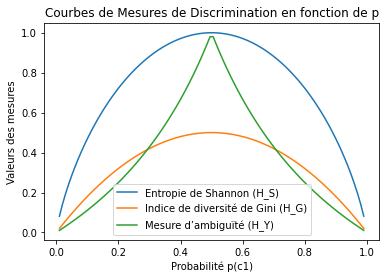

In [6]:
plt.plot(p_values, Hs, label='Entropie de Shannon (H_S)')
plt.plot(p_values, Hg, label='Indice de diversité de Gini (H_G)')
plt.plot(p_values, Hy, label='Mesure d’ambiguïté (H_Y)')

plt.title('Courbes de Mesures de Discrimination en fonction de p')
plt.xlabel('Probabilité p(c1)')
plt.ylabel('Valeurs des mesures')
plt.legend()

plt.show()

In [7]:
def couple_mesure(num_samples, H1, H2, labels): 
    p_values = []
    H1_values = []  
    H2_values = []

    for _ in range(num_samples):
        p = np.random.rand() 

        p_values.append(p)
        H1_values.append(H1(p))
        H2_values.append(H2(p))

    plt.scatter(H1_values, H2_values, c=p_values, cmap='viridis', marker='o', alpha=0.5)

    plt.title('Comparaison de Mesures de Discrimination')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    cbar = plt.colorbar()
    cbar.set_label('Probabilité p(c1)')
    plt.grid(True)
    plt.show()


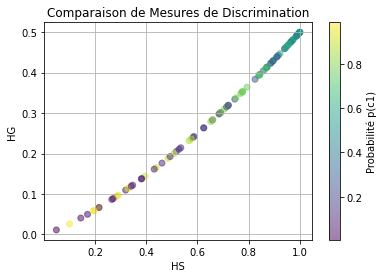

In [8]:
couple_mesure(100, HS, HG, ["HS", "HG"])

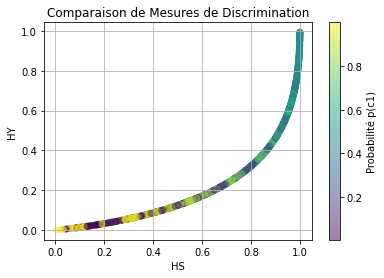

In [9]:
couple_mesure(1000, HS, HY, ["HS", "HY"])

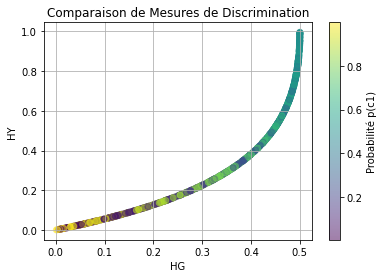

In [10]:
couple_mesure(1000, HG, HY, ["HG", "HY"])

Les principales différences entre ces mesures résident dans leur sensibilité aux distributions des classes. L'entropie de Shannon et l'indice de diversité de Gini sont plus sensibles aux distributions équilibrées, tandis que la mesure d'ambiguïté est plus sensible aux distributions déséquilibrées.

# Arbres de décision en présence de données symboliques

## Decision tree sur les données digits

In [11]:
base_digits = load_digits()
print("Descriptions de la base digits:\n", base_digits.data)

Descriptions de la base digits:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [12]:
dT = tree.DecisionTreeClassifier(criterion="entropy")
X = base_digits.data
y = base_digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dT.fit(X_train,y_train)
yhat = dT.predict(X_test)

accuracy = accuracy_score(y_test, yhat)
print("Accuracy : ", accuracy)

Accuracy :  0.8861111111111111


In [13]:
tree_rules = export_text(dT, feature_names=base_digits.feature_names )
print(tree_rules)

|--- pixel_5_2 <= 7.50
|   |--- pixel_5_3 <= 3.50
|   |   |--- pixel_3_2 <= 6.50
|   |   |   |--- pixel_3_6 <= 1.50
|   |   |   |   |--- pixel_7_7 <= 3.50
|   |   |   |   |   |--- pixel_3_5 <= 13.50
|   |   |   |   |   |   |--- pixel_6_5 <= 8.00
|   |   |   |   |   |   |   |--- pixel_3_5 <= 10.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- pixel_3_5 >  10.50
|   |   |   |   |   |   |   |   |--- pixel_0_4 <= 10.00
|   |   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |   |   |--- pixel_0_4 >  10.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- pixel_6_5 >  8.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- pixel_3_5 >  13.50
|   |   |   |   |   |   |--- pixel_3_3 <= 4.50
|   |   |   |   |   |   |   |--- pixel_0_1 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- pixel_0_1 >  0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   | 

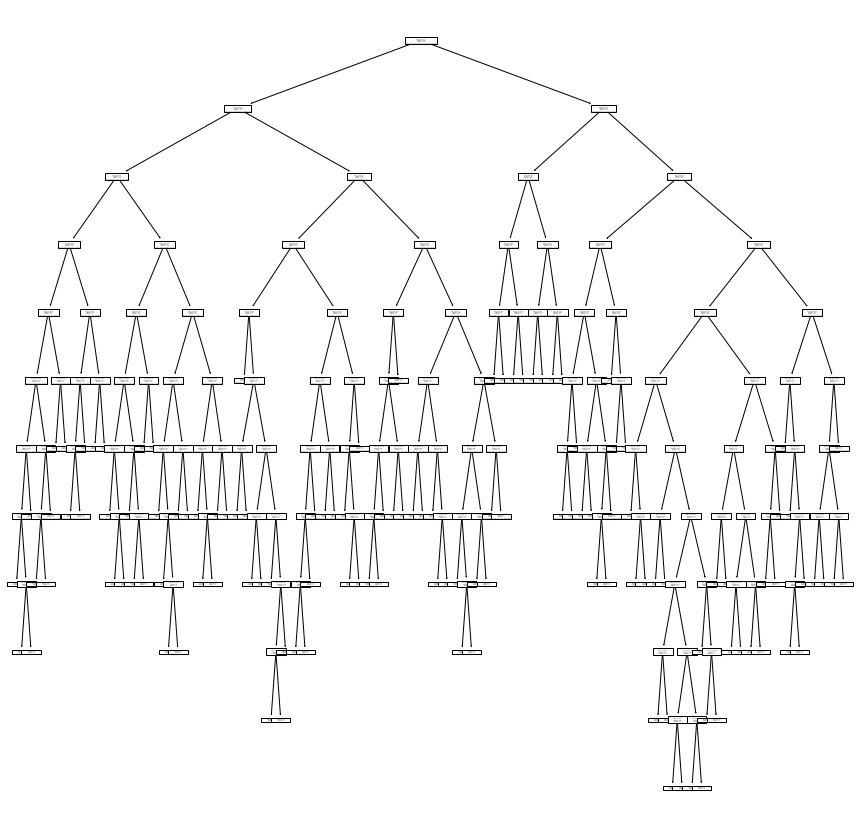

In [14]:
plt.figure(figsize=(15, 15))
tree.plot_tree(dT, feature_names= base_digits.feature_names)
plt.show()


## Données Election

### Decision Tree skleran

In [15]:
df_elec = pd.read_csv("data/elections.csv")
df_elec

,Adresse,Majeur?,Nationalite,Label
0,Paris,oui,Francais,1
1,Paris,non,Francais,-1
2,Montpellier,oui,Italien,1
3,Paris,oui,Suisse,-1
4,Strasbourg,non,Italien,-1
5,Strasbourg,non,Francais,-1
6,Strasbourg,oui,Francais,1
7,Montpellier,oui,Suisse,-1


In [16]:
columns_to_encode = ['Adresse', 'Nationalite']
df_elec = pd.get_dummies(df_elec, columns = columns_to_encode)
df_elec['Majeur?'] = df_elec['Majeur?'].replace({'oui':1, 'non':0})
df_elec

,Majeur?,Label,Adresse_Montpellier,Adresse_Paris,Adresse_Strasbourg,Nationalite_Francais,Nationalite_Italien,Nationalite_Suisse
0,1,1,0,1,0,1,0,0
1,0,-1,0,1,0,1,0,0
2,1,1,1,0,0,0,1,0
3,1,-1,0,1,0,0,0,1
4,0,-1,0,0,1,0,1,0
5,0,-1,0,0,1,1,0,0
6,1,1,0,0,1,1,0,0
7,1,-1,1,0,0,0,0,1


In [17]:
dT = tree.DecisionTreeClassifier(criterion="entropy")
X = df_elec.drop("Label", axis=1)
y = df_elec["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dT.fit(X_train,y_train)
yhat = dT.predict(X_test)

accuracy = accuracy_score(y_test, yhat)
print("Accuracy : ", accuracy)

Accuracy :  0.0


In [18]:
df_elec_train = pd.get_dummies(X_train)
df_elec_train["label"] = y_train
df_elec_train

,Majeur?,Adresse_Montpellier,Adresse_Paris,Adresse_Strasbourg,Nationalite_Francais,Nationalite_Italien,Nationalite_Suisse,label
0,1,0,1,0,1,0,0,1
7,1,1,0,0,0,0,1,-1
2,1,1,0,0,0,1,0,1
4,0,0,0,1,0,1,0,-1
3,1,0,1,0,0,0,1,-1
6,1,0,0,1,1,0,0,1


In [19]:
df_elec_test = pd.get_dummies(X_test)
df_elec_test["label"] = y_test
df_elec_test

,Majeur?,Adresse_Montpellier,Adresse_Paris,Adresse_Strasbourg,Nationalite_Francais,Nationalite_Italien,Nationalite_Suisse,label
1,0,0,1,0,1,0,0,-1
5,0,0,0,1,1,0,0,-1


On note donne les gains d'information trouvées pour chaque attribut : 

In [20]:
feature_importances = dT.feature_importances_
feature_names = X_train.columns

entropy_df = pd.DataFrame({'Feature': feature_names, 'Entropy': feature_importances})
entropy_df.sort_values(by='Entropy', ascending=False, inplace=True)
entropy_df

,Feature,Entropy
4,Nationalite_Francais,0.459148
0,Majeur?,0.333333
6,Nationalite_Suisse,0.207519
1,Adresse_Montpellier,0.000000
2,Adresse_Paris,0.000000
3,Adresse_Strasbourg,0.000000
5,Nationalite_Italien,0.000000


On a obtenu l'arbre de décision suivant : 


In [21]:
tree_rules = export_text(dT, feature_names= df_elec.columns.to_list()[1:])
print(tree_rules)

|--- Nationalite_Francais <= 0.50
|   |--- Nationalite_Suisse <= 0.50
|   |   |--- Label <= 0.50
|   |   |   |--- class: -1
|   |   |--- Label >  0.50
|   |   |   |--- class: 1
|   |--- Nationalite_Suisse >  0.50
|   |   |--- class: -1
|--- Nationalite_Francais >  0.50
|   |--- class: 1



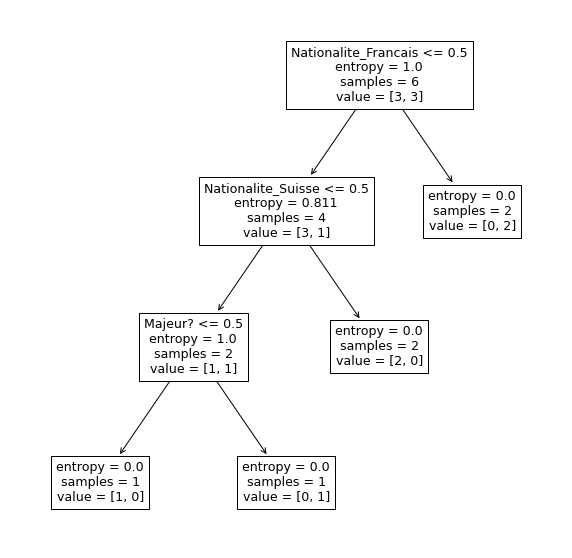

In [22]:
plt.figure(figsize=(10, 10))
tree.plot_tree(dT, feature_names= df_elec.drop("Label", axis=1).columns.to_list())
plt.show()


On observe ici que l'on avait obtenu une accuracy de 0 sur l'ensemble de test. Cela peut s'explique par la taille du dataset (2 exemples en test et 6 en train) On est dans un cas de sous-apprentissage. . Le gain d'information maxiaml est pour l'attribut nationalite_francais. Or, il suffit que que l'individu soit de nationalité française pour que le label soit 1. Dans notre ensmeble de test cet attribut est à 1 mais le label est à -1 ce qui est un cas que l'on n'avait jamais rencontré dans l'ensemble train.

### Notre Decision Tree 

In [23]:
df_elec = pd.read_csv("data/elections.csv")
X = df_elec.drop("Label", axis=1)
y = df_elec["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [24]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [25]:
class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def shannon(self, liste):
        u, c = np.unique(liste, return_counts=True)
        P = c / len(liste)
        if len(P)== 1:
            return 0.0
        H = 0
        for p in P : 
            if p != 0 : 
                H -= p*np.log(p)/np.log(len(P))
        return H

    def entropie_relative(self, liste):
        H = self.shannon(liste)
        return  H

    def information_gain(self, X, y, attr):
        entropies_cond = []
        unique_values, value_counts = np.unique(X[:, attr], return_counts=True)

        for value in unique_values:
            subset_mask = X[:, attr] == value
            subset_y = y[subset_mask]
            entropies_cond.append(self.entropie_relative(subset_y))
        H_conditional = np.average([ent for ent in entropies_cond], weights=value_counts)
        
        H_label = self.shannon(y)
        return H_label - H_conditional

    def select_best_attribute(self, X, y):
        attr_gain = [self.information_gain(X, y, attr) for attr in range(X.shape[1])]
        best_attr = np.argmax(attr_gain)
        return best_attr, attr_gain[best_attr]

    def build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            values, counts = np.unique(y, return_counts=True)
            return values[np.argmax(counts)]

        best_attr, _ = self.select_best_attribute(X, y)

        unique_values = np.unique(X[:, best_attr])
        subtree = {}

        for value in unique_values:
            subset_mask = X[:, best_attr] == value
            subset_X, subset_y = X[subset_mask], y[subset_mask]
            subtree[value] = self.build_tree(subset_X, subset_y, depth + 1)

        return {'attribute': best_attr, 'subtree': subtree}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_example(x) for x in X])

    def _predict_example(self, x):
        node = self.tree
        while isinstance(node, dict):
            attribute = node['attribute']
            value = x[attribute]
            if value in node['subtree']:
                node = node['subtree'][value]
            else:
                return max(node['subtree'], key=node['subtree'].get)
        return node
    
    def predict_xai(self, X, feature_names):
        class_list = []
        path_list = []
        for x in X:
            node = self.tree
            path = []
            while isinstance(node, dict):
                attribute = node['attribute']
                value = x[attribute]
                attribute_name = feature_names[attribute]  
                path.append((attribute_name, value))
                if value in node['subtree']:
                    node = node['subtree'][value]
                else:
                    class_list.append(max(node['subtree'], key=node['subtree'].get))
                    path_list.append(path)
                    break
            class_list.append(node)
            path_list.append(path)
        return class_list, path_list
    
    def affiche_tree(self, feature_names, node=None, indent="|--- "):
        if node is None:
            node = self.tree

        if isinstance(node, dict):
            attribute = node['attribute']
            subtree = node['subtree']
            unique_values = list(subtree.keys())
            
            if attribute is not None:
                for value in unique_values:
                    condition = f"{feature_names[attribute]} <= {value}"
                    print(f"{indent}{condition}")
                    self.affiche_tree(feature_names, subtree[value], indent + "|   ")
            else:
                if len(unique_values) == 1:
                    print(f"{indent}class: {unique_values[0]}")
                else:
                    for value in unique_values:
                        condition = f"class: {value}"
                        print(f"{indent}{condition}")
        else:
            print(f"{indent}class: {node}")


In [26]:
mytree = MyDecisionTreeClassifier(max_depth=10) 
mytree.fit(X_train, y_train)
y_pred = mytree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

Accuracy :  0.0


In [27]:
mytree.affiche_tree(X.columns.tolist())


|--- Nationalite <= Francais
|--- |   class: 1
|--- Nationalite <= Italien
|--- |   Adresse <= Montpellier
|--- |   |   class: 1
|--- |   Adresse <= Strasbourg
|--- |   |   class: -1
|--- Nationalite <= Suisse
|--- |   class: -1


On obtient un arbre de décision différent de celui obtenu par sklearn puisque l'on regarde des variables catégorielles. 

In [28]:
df_elec_test

,Majeur?,Adresse_Montpellier,Adresse_Paris,Adresse_Strasbourg,Nationalite_Francais,Nationalite_Italien,Nationalite_Suisse,label
1,0,0,1,0,1,0,0,-1
5,0,0,0,1,1,0,0,-1


In [29]:
class_list, path_list = mytree.predict_xai(X_test, feature_names)

In [30]:
path_list

[[('Adresse_Paris', 'Francais')], [('Adresse_Paris', 'Francais')]]

Encore une fois, on obtient ici une accuracy de 0, car le premier attribut utilisé dans le decision tree est la nationalité française. Or, dans notre ensemble de test on se trouve dans un cas qui n'a jamais été vu en test à savoir le cas où la nationalité est française mais le label est -1.   

## Mushrooms

### Decision tree de sklearn

In [31]:
df_mush = pd.read_csv("data/mushrooms-1124.csv")
df_mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,s,u
1,e,x,f,n,f,n,f,w,b,h,...,f,w,w,p,w,o,e,k,a,g
2,p,x,y,e,f,s,f,c,n,b,...,s,w,w,p,w,o,e,w,v,d
3,p,x,y,g,f,f,f,c,b,h,...,k,b,b,p,w,o,l,h,v,p
4,p,x,s,e,f,s,f,c,n,b,...,k,p,p,p,w,o,e,w,v,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,e,b,s,w,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,s,g
1120,p,k,s,n,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
1121,e,f,y,g,t,n,f,c,b,w,...,s,p,w,p,w,o,p,n,v,d
1122,p,x,y,e,f,y,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l


In [32]:
unique_labels = df_mush['class'].unique()
print(unique_labels)
classe = df_mush['class']

['p' 'e']


In [33]:
df_mush = pd.get_dummies(df_mush.drop("class", axis=1))
df_mush.insert(0, "class", classe)
df_mush['class'] = df_mush['class'].map({'p': 1, 'e': -1})
df_mush

,class,cap-shape_b,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,-1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,-1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1120,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1121,-1,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1122,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [34]:
feature_names = df_mush.columns.tolist()
feature_names = feature_names[1:]

In [35]:
dT = tree.DecisionTreeClassifier(criterion="entropy")
X = df_mush.drop("class", axis=1)
y = df_mush["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dT.fit(X_train,y_train)
yhat = dT.predict(X_test)

accuracy = accuracy_score(y_test, yhat)
print("Accuracy : ", accuracy)

Accuracy :  1.0


In [36]:
tree_rules = export_text(dT, feature_names=feature_names )
print(tree_rules)

|--- odor_n <= 0.50
|   |--- bruises_f <= 0.50
|   |   |--- odor_p <= 0.50
|   |   |   |--- odor_f <= 0.50
|   |   |   |   |--- class: -1
|   |   |   |--- odor_f >  0.50
|   |   |   |   |--- class: 1
|   |   |--- odor_p >  0.50
|   |   |   |--- class: 1
|   |--- bruises_f >  0.50
|   |   |--- class: 1
|--- odor_n >  0.50
|   |--- spore-print-color_r <= 0.50
|   |   |--- gill-size_n <= 0.50
|   |   |   |--- class: -1
|   |   |--- gill-size_n >  0.50
|   |   |   |--- stalk-surface-above-ring_k <= 0.50
|   |   |   |   |--- cap-shape_b <= 0.50
|   |   |   |   |   |--- class: -1
|   |   |   |   |--- cap-shape_b >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- stalk-surface-above-ring_k >  0.50
|   |   |   |   |--- class: 1
|   |--- spore-print-color_r >  0.50
|   |   |--- class: 1



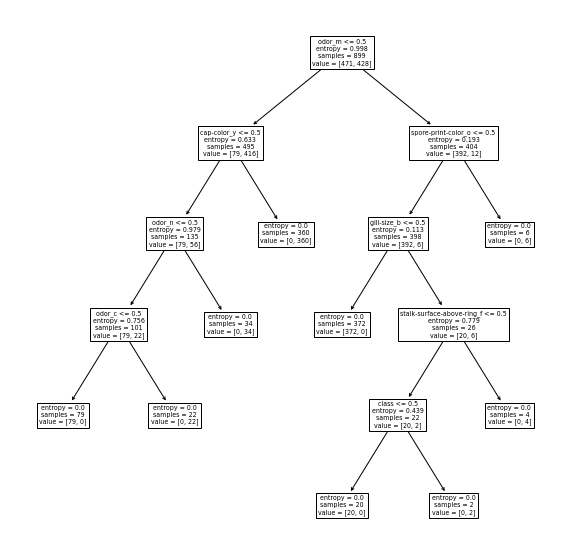

In [37]:
plt.figure(figsize=(10, 10))
tree.plot_tree(dT, feature_names= df_mush.columns.to_list())
plt.show()


### Notre Decision Tree 

In [38]:
df_mush = pd.read_csv("data/mushrooms-1124.csv")
X = df_mush.drop("class", axis=1)
y = df_mush["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
feature_names = X.columns.to_list()
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

In [40]:
mytree = MyDecisionTreeClassifier(max_depth=10) 
mytree.fit(X_train, y_train)
y_pred = mytree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

Accuracy :  1.0


In [41]:
mytree.affiche_tree(X.columns.tolist())


|--- odor <= a
|--- |   class: e
|--- odor <= c
|--- |   class: p
|--- odor <= f
|--- |   class: p
|--- odor <= l
|--- |   class: e
|--- odor <= m
|--- |   class: p
|--- odor <= n
|--- |   spore-print-color <= b
|--- |   |   class: e
|--- |   spore-print-color <= h
|--- |   |   class: e
|--- |   spore-print-color <= k
|--- |   |   class: e
|--- |   spore-print-color <= n
|--- |   |   class: e
|--- |   spore-print-color <= o
|--- |   |   class: e
|--- |   spore-print-color <= r
|--- |   |   class: p
|--- |   spore-print-color <= w
|--- |   |   habitat <= d
|--- |   |   |   class: p
|--- |   |   habitat <= g
|--- |   |   |   class: e
|--- |   |   habitat <= l
|--- |   |   |   cap-shape <= b
|--- |   |   |   |   class: p
|--- |   |   |   cap-shape <= f
|--- |   |   |   |   class: e
|--- |   |   |   cap-shape <= k
|--- |   |   |   |   class: e
|--- |   |   |   cap-shape <= x
|--- |   |   |   |   class: e
|--- |   |   habitat <= p
|--- |   |   |   class: e
|--- |   |   habitat <= w
|--- |  

In [42]:
feature_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [43]:
class_list, path_list = mytree.predict_xai(X_test[:5], feature_names)

In [44]:
class_list

['p', 'p', 'p', 'e', 'e']

In [45]:
path_list

[[('odor', 'f')],
 [('odor', 's')],
 [('odor', 'f')],
 [('odor', 'n'), ('spore-print-color', 'k')],
 [('odor', 'n'), ('spore-print-color', 'n')]]

Ici on peut voir que pour classifier le premier exemple, on commence par regarder l'attribut odor qui vaut f ce qui nous permet de prédire immédiatement la classe p. 